<h1 align=right><span style='font-family:Arial Black'>Henry</span></h1>
<p><img src="formas/EDA.jpg", width="250"></p>

# EDA: *`Exploración y análisis de datos:`*
1. *`Analizando los datos para crear el insumo de mis endpoints`*
2. *`Analizando los datos numéricos de mis variables`*
3. *`Analizando los datos categoricos de mis variables`*

In [1]:
# Para empezar, importamos las librerías requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Abrimos el archivo general de trabajo que mandamos a folder data
df = pd.read_csv('../data/df_trabajo.csv')
df.head(2)

,user_id,item_id,playtime_forever,sentiment_analysis,recommend,review,posted_year,title,id,genero,release_year
0,76561197970982479,22200,271,1,True,It's unique and worth a playthrough.,2011,Lost Summoner Kitty,761140.0,Casual,2018
1,76561197970982479,1250,10006,1,True,Simple yet with great replayability. In my opi...,2011,Lost Summoner Kitty,761140.0,Action,2018


In [3]:
# Checamos la información acerca del dataset,
# encontrandose 42454 registros y 11 columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42454 entries, 0 to 42453
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             42454 non-null  object 
 1   item_id             42454 non-null  int64  
 2   playtime_forever    42454 non-null  int64  
 3   sentiment_analysis  42454 non-null  int64  
 4   recommend           42454 non-null  bool   
 5   review              42436 non-null  object 
 6   posted_year         42454 non-null  int64  
 7   title               42454 non-null  object 
 8   id                  42454 non-null  float64
 9   genero              42454 non-null  object 
 10  release_year        42454 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 3.3+ MB


## *Analizando los datos para crear el insumo de mis endpoints*

### `Para el primer endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['genero','release_year','playtime_forever']]`

In [4]:
# De el archivo df, necesitamos las columnas: 'genero','release_year','playtime_forever'
# para generar nuestro dataset 'genero.csv'
genero = df[['genero','release_year','playtime_forever']].groupby(['release_year','genero']).count().sort_values(by='playtime_forever',ascending=False)
genero.reset_index(inplace=True)
genero

,release_year,genero,playtime_forever
0,2017,Indie,3715
1,2016,Indie,2542
2,2017,Action,2308
3,2017,Casual,1941
4,2017,Adventure,1857
...,...,...,...
347,1996,Strategy,1
348,1996,Sports,1
349,1996,Simulation,1
350,1996,Racing,1


In [5]:
#genero.to_csv('genero.csv',index=False)

### `Para el segundo endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['genero','posted_year','user_id','playtime_forever']]`

In [6]:
# De el dataset df, necesitamos las columnas: 'genero','posted_year','user_id','playtime_forever'
# para generar nuestro dataset:'userforgenre.csv'
gene = df[['genero','posted_year','user_id','playtime_forever']].groupby(['posted_year','genero','user_id']).count().sort_values(by='playtime_forever',ascending=False)
gene.reset_index(inplace=True)
gene

,posted_year,genero,user_id,playtime_forever
0,2014,Strategy,king_perish,7
1,2015,Strategy,sunnydazeex,7
2,2015,Action,76561198077596124,7
3,2014,Action,Bongholio,7
4,2015,Action,76561198047210840,7
...,...,...,...,...
39584,2014,Indie,FictionDaddy,1
39585,2014,Indie,FieryWolf29,1
39586,2014,Indie,Findoogle,1
39587,2014,Indie,FinnMcCruel,1


In [7]:
#gene.to_csv('userforgenre.csv',index=False)

### `Para el tercer endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['recommend','posted_year','sentiment_analysis','title']]`

In [8]:
# De el archivo 'df', necesitamos las columnas:'sentiment_analysis', 'recommend', 'posted_year','title', 
# se creara el dataset de trabajo: 'UsersRecommend.csv'
rec = df[df.recommend==True][['posted_year','sentiment_analysis','title']].groupby(['posted_year','title']).count().sort_values(by='sentiment_analysis',ascending=False)
rec.reset_index(inplace=True)
rec

,posted_year,title,sentiment_analysis
0,2014,Pixel Puzzles Ultimate - Puzzle Pack: 2000 AD,6
1,2023,Bot Colony,6
2,2023,You... and who else?,6
3,2015,Rust,6
4,2014,Frontiers.io,6
...,...,...,...
28424,2014,Pixel Puzzles Ultimate - Puzzle Pack: New Engl...,1
28425,2014,Pixel Puzzles Ultimate - Puzzle Pack: Montana,1
28426,2014,Pixel Puzzles Ultimate - Puzzle Pack: Jigsaw,1
28427,2014,Pixel Puzzles Ultimate - Puzzle Pack: Ireland,1


In [9]:
#rec.to_csv('UsersRecommend.csv',index=False)

### `Para el cuarto endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['recommend','posted_year','sentiment_analysis','title']]`

In [10]:
# De el archivo 'df', necesitamos las columnas:'sentiment_analysis', 'recommend', 'posted_year','app_name', 
# se creara el dataset de trabajo: 'UsersNotRecommend.csv'
reco = df[df.recommend==False][['posted_year','sentiment_analysis','title']].groupby(['posted_year','title']).count().sort_values(by='sentiment_analysis',ascending=False)
reco.reset_index(inplace=True)
reco

,posted_year,title,sentiment_analysis
0,2015,Melina (Character for Occult Raise),4
1,2023,EURGAVA™ - Fight for Haaria,4
2,2014,Niffelheim,4
3,2015,Super Fancy Pants Adventure,3
4,2015,Reptilian Rebellion,3
...,...,...,...
4453,2015,Alchemist's Castle,1
4454,2015,Alea Jacta Est,1
4455,2015,Alexander (Character for Occult Raise),1
4456,2015,Alicemare,1


In [11]:
#reco.to_csv('UsersNotRecommend.csv',index=False)

### `Para el quinto endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['release_year','review','sentiment_analysis']]`

In [12]:
# De el archivo 'df', necesitamos las columnas:'release_year','review','sentiment_analysis',
# vamos a crear el dataset de trabajo: 'sentimientos.csv'
sent = df[['release_year','review','sentiment_analysis']]
sent.head(2000)

,release_year,review,sentiment_analysis
0,2018,It's unique and worth a playthrough.,1
1,2018,Simple yet with great replayability. In my opi...,1
2,2018,Great atmosphere. The gunplay can be a bit chu...,1
3,2018,For a simple (it's actually not all that simpl...,1
4,2018,Very fun little game to play when your bored o...,1
...,...,...,...
1995,2013,Spent hours looking for gear only to be shot i...,0
1996,2013,You NEED to buy this game.,0
1997,2013,BEST GAME EVER,2
1998,2013,good,2


In [13]:
#sent.head(2000).to_csv('sentimientos.csv',index=False)

### `Para el sexto endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['title','review']]`

In [14]:
# De el archivo 'df', necesitamos las columnas:'title','review', 
# vamos a crear el dataset de trabajo: 'recomendacion_juego.csv' 
rec_juego = df[['title','review']]
rec_juego.head(2000)

,title,review
0,Lost Summoner Kitty,It's unique and worth a playthrough.
1,Lost Summoner Kitty,Simple yet with great replayability. In my opi...
2,Lost Summoner Kitty,Great atmosphere. The gunplay can be a bit chu...
3,Lost Summoner Kitty,For a simple (it's actually not all that simpl...
4,Ironbound,Very fun little game to play when your bored o...
...,...,...
1995,Sanctum 2: Ruins of Brightholme,Spent hours looking for gear only to be shot i...
1996,Sanctum 2: Ruins of Brightholme,You NEED to buy this game.
1997,Cities in Motion 2: Back to the Past,BEST GAME EVER
1998,Saints Row IV - Wild West Pack,good


In [15]:
#rec_juego.head(2000).to_csv('recomendacion_juego.csv',index=False)

### `Para el septimo endpoint, necesitamos la siguiente fracción de nuestro archivo de trabajo:`
* `df[['user_id','title']]`

In [16]:
# De el dataset 'df', tomamos las columnas: 'user_id','title',
# para crear el dataset de trabajo: 'recomendacion_usuario.csv'
rec_usuario = df[['user_id','title']]
rec_usuario

,user_id,title
0,76561197970982479,Lost Summoner Kitty
1,76561197970982479,Lost Summoner Kitty
2,76561197970982479,Lost Summoner Kitty
3,js41637,Lost Summoner Kitty
4,js41637,Ironbound
...,...,...
42449,76561198087196831,Russian Roads
42450,76561198087196831,Russian Roads
42451,76561198087216220,Russian Roads
42452,L3afBlower,EXIT 2 - Directions


In [17]:
#rec_usuario.to_csv('recomendacion_usuario.csv',index=False)

## *Analizando los datos numéricos de mis variables*

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42454 entries, 0 to 42453
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             42454 non-null  object 
 1   item_id             42454 non-null  int64  
 2   playtime_forever    42454 non-null  int64  
 3   sentiment_analysis  42454 non-null  int64  
 4   recommend           42454 non-null  bool   
 5   review              42436 non-null  object 
 6   posted_year         42454 non-null  int64  
 7   title               42454 non-null  object 
 8   id                  42454 non-null  float64
 9   genero              42454 non-null  object 
 10  release_year        42454 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(4)
memory usage: 3.3+ MB


In [19]:
df.skew()

item_id              -0.186571
playtime_forever      6.834745
sentiment_analysis   -0.024404
recommend            -2.448324
posted_year           1.455608
id                   -0.159447
release_year         -4.015289
dtype: float64

In [20]:
df.describe()

,item_id,playtime_forever,sentiment_analysis,posted_year,id,release_year
count,42454.000000,42454.000000,42454.000000,42454.000000,4.245400e+04,42454.000000
mean,185226.917864,9121.373934,1.187709,2015.796038,4.564239e+05,2015.145169
std,126654.502403,22035.511661,0.574285,3.484066,1.784880e+05,2.957134
min,10.000000,0.000000,0.000000,2010.000000,1.000000e+01,1983.000000
25%,42960.000000,406.000000,1.000000,2014.000000,3.337730e+05,2015.000000
50%,221100.000000,1580.000000,1.000000,2015.000000,4.511600e+05,2016.000000
75%,268420.000000,6850.750000,2.000000,2015.000000,5.950300e+05,2017.000000
max,527340.000000,642773.000000,2.000000,2023.000000,2.028850e+06,2021.000000


In [21]:
df.corr()

,item_id,playtime_forever,sentiment_analysis,recommend,posted_year,id,release_year
item_id,1.000000,-0.285187,-0.029702,-0.101513,0.279235,0.018842,0.017969
playtime_forever,-0.285187,1.000000,0.005836,0.055559,-0.006970,0.010458,0.003590
sentiment_analysis,-0.029702,0.005836,1.000000,0.108368,-0.034725,0.001384,0.012305
recommend,-0.101513,0.055559,0.108368,1.000000,-0.100722,-0.022843,-0.020748
posted_year,0.279235,-0.006970,-0.034725,-0.100722,1.000000,0.033531,0.029320
id,0.018842,0.010458,0.001384,-0.022843,0.033531,1.000000,0.582045
release_year,0.017969,0.003590,0.012305,-0.020748,0.029320,0.582045,1.000000


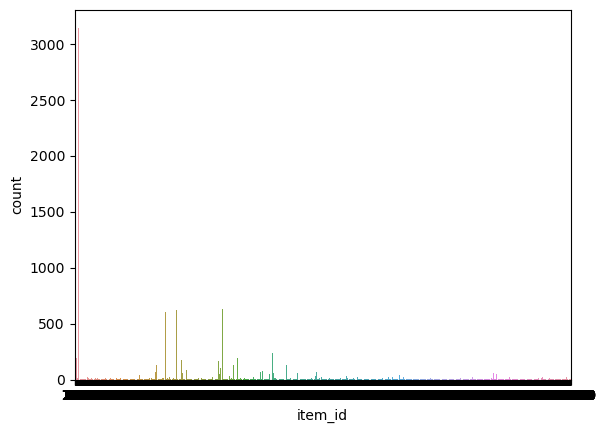

In [22]:
sns.countplot(x='item_id',data=df)
plt.show()

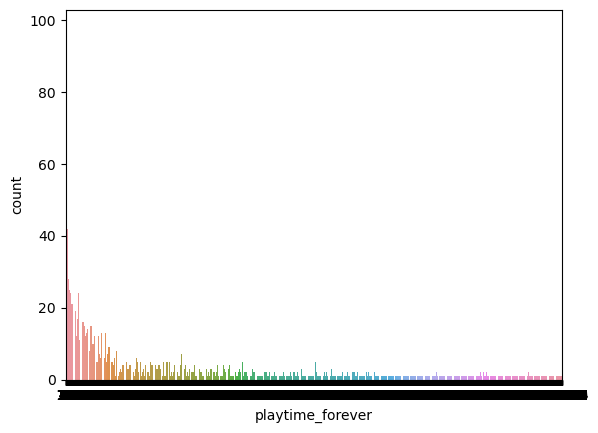

In [23]:
sns.countplot(x='playtime_forever',data=df)
plt.show()

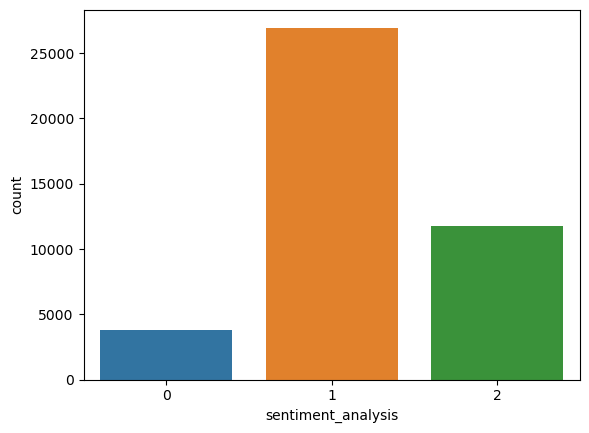

In [24]:
sns.countplot(x='sentiment_analysis',data=df)
plt.show()

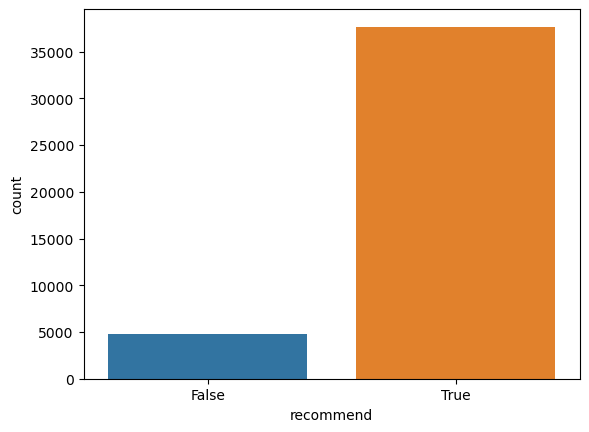

In [25]:
sns.countplot(x='recommend',data=df)
plt.show()

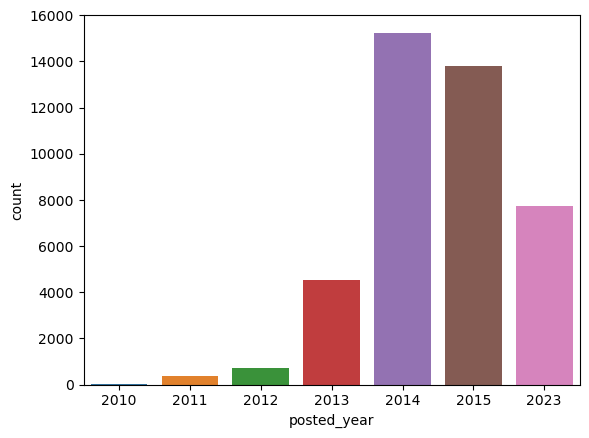

In [26]:
sns.countplot(x='posted_year',data=df)
plt.show()

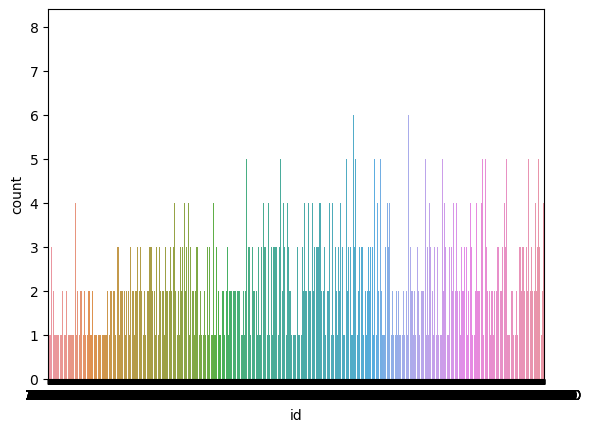

In [27]:
sns.countplot(x='id',data=df)
plt.show()

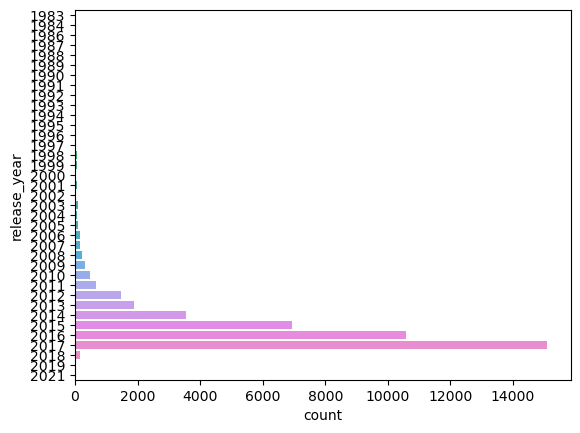

In [28]:
sns.countplot(y='release_year',data=df)
plt.show()

## *Analizando los datos categoricos de mis variables*

### `Creamos una grafica con principales generos de los juegos`

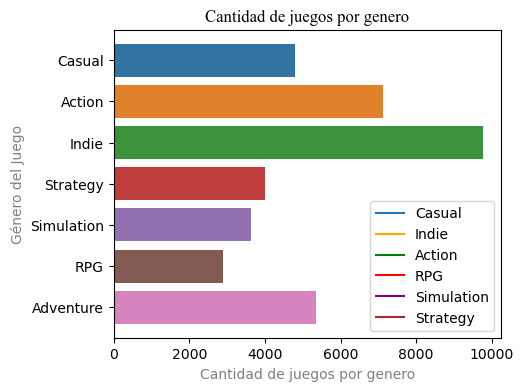

In [29]:
genero = df[df['genero'].isin(['Casual','Indie','Adventure','Action','RPG','Simulation','Strategy'])]
plt.figure(figsize=(5,4))
plt.title('Cantidad de juegos por genero',fontname='Times New Roman')
sns.countplot(y='genero',data=genero)
plt.ylabel('Género del Juego',color='gray')
plt.plot(5000,1,label='Casual')
plt.plot(5000,1,label='Indie',c='orange')
plt.plot(5000,1,label='Action',c='g')
plt.plot(5000,1,label='RPG',c='r')
plt.plot(5000,1,label='Simulation',c='purple')
plt.plot(5000,1,label='Strategy',c='brown')
plt.xlabel('Cantidad de juegos por genero',color='gray')
plt.legend();

### *Nube de palabras de la columna:* `genero`

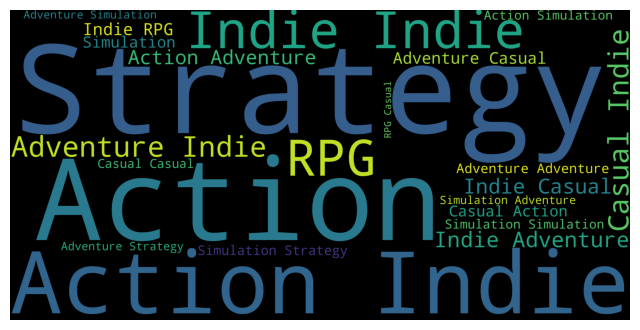

In [30]:
# Creamos variable para 'genero', para desplegar palabras que mas se repiten en 'genero' de los juegos. 
genero['genero'] = genero['genero'].astype('str')
genero_wd = ' '.join(genero['genero'])
genero_wc = WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(genero_wd)
plt.figure(figsize=(8,6))
plt.imshow(genero_wc)
plt.axis('off');

### *Nube de palabras de la columna:* `review`

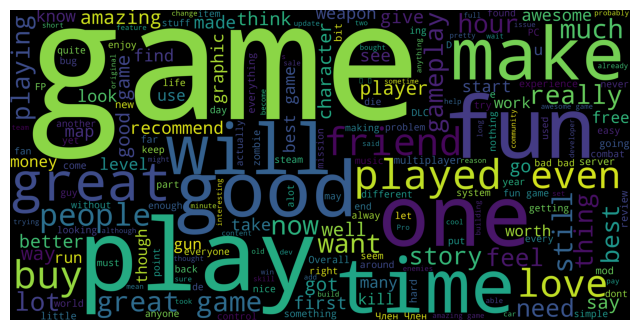

In [31]:
# Creamos variable para 'review', para desplegar palabras que mas se repiten en 'review' de los juegos. 
rec_juego['review'] = rec_juego['review'].astype('str')
rec_juego_wd = ' '.join(rec_juego['review'])
rec_juego_wc = WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(rec_juego_wd)
plt.figure(figsize=(8,6))
plt.imshow(rec_juego_wc)
plt.axis('off');

### *Nube de palabras de la columna:* `title`

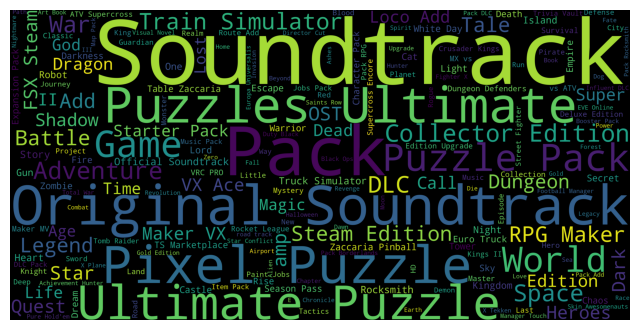

In [32]:
# Creamos variable para 'app_name', para desplegar palabras que mas se repiten en 'app_name' o nombres de juegos. 
rec_juego['title'] = rec_juego['title'].astype('str')
rec_juego_wd = ' '.join(rec_juego['title'])
rec_juego_wc = WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(rec_juego_wd)
plt.figure(figsize=(8,6))
plt.imshow(rec_juego_wc)
plt.axis('off');

### *Nube de palabras de la columna:* `user_id`

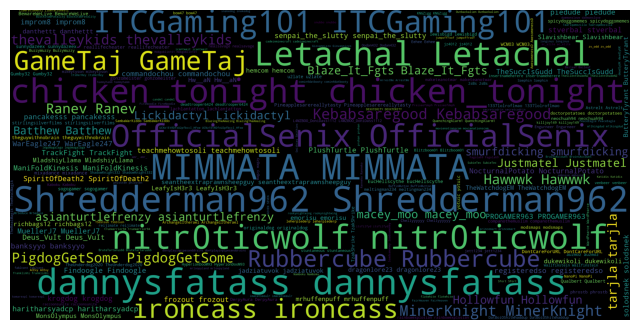

In [33]:
# Creamos variable para 'user_id', para desplegar palabras que mas se repiten en 'user_id' o nombres de juegos. 
rec_usuario['user_id'] = rec_usuario['user_id'].astype('str')
rec_usuario_wd = ' '.join(rec_usuario['user_id'])
rec_usuario_wc = WordCloud(stopwords=STOPWORDS,background_color='black',height=2000,width=4000).generate(rec_usuario_wd)
plt.figure(figsize=(8,6))
plt.imshow(rec_usuario_wc)
plt.axis('off');

## *Funciones:*`API`

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

def PlayTimeGenre(genero:str):
    '''Debe devolver año con más horas jugadas para dicho género.Ejemplo de retorno: 
    {"Año de lanzamiento con más horas jugadas para el Género X" : 2013}'''
    df = pd.read_csv('./genero.csv')
    d = df.loc[df.genero==genero]
    e = d.playtime_forever.count()
    f = d.release_year.to_list()[0]
    return {'Año de lanzamiento':f}

def UserForGenre(genero:str): 
    '''Debe devolver el usuario que acumula más horas jugadas para el género dado y una 
    lista de la acumulación de las horas jugadas por año. Ejemplo de retorno: 
    {"Usuario con más horas jugadas para el Género X" : us213ndjss09sdf, "Horas jugadas":
    [{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas: 23}]}'''
    df = pd.read_csv('./userforgenre.csv')
    gen = df.loc[df.genero==genero]
    u = gen.user_id.to_list()[0]
    d = gen.posted_year.to_list()
    f = gen['playtime_forever'].to_list()
    return {'Usuario por género':u,'Horas jugadas':{'Año':d[0:3], 'Horas':f[0:3]}}

def UsersRecommend(anio:int): 
    '''Devuelve el top 3 de juegos MÁS recomendados por usuarios para el año dado. (reviews.recommend = 
    True y comentarios positivos/neutrales). Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},
    {"Puesto 3" : Z}]'''
    df = pd.read_csv('./UsersRecommend.csv')
    a = df.loc[df.posted_year==anio]
    b = a.sentiment_analysis.count()
    c = a.title.to_list()
    return {'Puesto 1':c[0],'Puesto 2':c[1],'Puesto 3':c[2]}
    
def UsersNotRecommend(anio:int): 
    '''Devuelve el top 3 de juegos MENOS recomendados por usuarios para el año dado. (reviews.recommend = 
    False y comentarios negativos). Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]'''
    df = pd.read_csv('./UsersNotRecommend.csv')
    d = df.loc[df.posted_year==anio]
    e = d.sentiment_analysis.count()
    f = d.title.to_list()
    return {'Puesto 1':f[0],'Puesto 2':f[1],'Puesto 3':f[2]}
    
def sentiment_analysis(anio:int): 
    '''Según el año de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas
       de usuarios que se encuentren categorizados con un análisis de sentimiento.'''
    df = pd.read_csv('./sentimientos.csv')
    d = df[df['release_year']==anio]
    e = d['review'].count()
    f = d[d['sentiment_analysis']==0.0].count()
    g = d[d['sentiment_analysis']==1.0].count()
    h = d[d['sentiment_analysis']==2.0].count()
    neg = (f/e)*len(d)
    neu = (g/e)*len(d)
    pos = (h/e)*len(d)
    a = neg.to_list()[0]
    b = neu.to_list()[1]
    c = pos.to_list()[2]
    return {'Negative':a, 'Neutral':b,'Positive':c}

def recomendacion_juego(titulo):
    '''Ingresando el título de un juego, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado.'''
    g = pd.read_csv('./recomendacion_juego.csv')
    tfidf = TfidfVectorizer(stop_words = 'english')
    g['review'] = g['review'].fillna('')
    tfidf_matriz = tfidf.fit_transform(g['review']) 
    coseno_sim = linear_kernel(tfidf_matriz,tfidf_matriz)
    indices = pd.Series(g.index, index = g['title'])
    idx = indices[titulo]
    simil = list(enumerate(coseno_sim[idx]))
    simil = sorted(simil, key = lambda x: x[0],reverse=True)
    simil = simil[1:11]
    usuario_index = [g[0] for g in simil]
    lista = g['title'].iloc[usuario_index].to_list()[:5]
    return {'Recomendacion_juego':lista}
    
def recomendacion_usuario(user_id):
    '''Ingresando el id de un usuario, deberíamos recibir una lista con 5 juegos recomendados para dicho usuario.'''
    g = pd.read_csv('./recomendacion_usuario.csv')
    tfidf = TfidfVectorizer(stop_words = 'english')
    g['user_id'] = g['user_id'].fillna('')
    tfidf_matriz = tfidf.fit_transform(g['user_id']) 
    coseno_sim = linear_kernel(tfidf_matriz,tfidf_matriz)
    indices = pd.Series(g.index, index = g['user_id'])
    idx = indices[user_id]
    simil = list(enumerate(coseno_sim[idx]))
    simil = sorted(simil, key = lambda x: x[0],reverse=True)
    simil = simil[1:11]
    usuario_index = [g[0] for g in simil]
    lista = g['title'].iloc[usuario_index].to_list()[:5]
    return {'Recomendacion_usuario':lista}

In [35]:
print(PlayTimeGenre('Free to Play'))
print(UserForGenre('Indie'))
print(UsersRecommend(2012))
print(UsersNotRecommend(2013))
print(sentiment_analysis(2011))
print(recomendacion_juego('Lost Summoner Kitty'))
print(recomendacion_usuario('arronlim13'))

{'Año de lanzamiento': 2017}
{'Usuario por género': '76561198044023118', 'Minutos jugados': {'Año': [2015, 2023, 2014], 'Minutos': [5, 4, 4]}}
{'Puesto 1': 'AdventureQuest 3D', 'Puesto 2': 'Guns and Robots - Starter Pack', 'Puesto 3': 'Evil Come'}
{'Puesto 1': 'Game Character Hub: DS Generator Parts', 'Puesto 2': 'TMM: Entourage', 'Puesto 3': "Saints Row IV - Pirate's Booty Pack"}
{'Negative': 40.0, 'Neutral': 202.0, 'Positive': 74.0}
{'Recomendacion_juego': ['Lost Summoner Kitty', 'Lost Summoner Kitty', 'Lost Summoner Kitty', 'Lost Summoner Kitty']}
{'Recomendacion_usuario': ['EXIT 2 - Directions', 'Russian Roads', 'Russian Roads', 'Russian Roads', 'LOGistICAL: South Africa']}


<h6 align=right><i>Cohorte</i>:DataPT04</h6>
<h6 align=right><i>Mexico - 2023</i></h6>
<h6 align=left><i>Pag. 2</i></h6>